In [1]:
import sys

In [ ]:
sys.path

In [2]:
for i in ['/home/javed/venvs/exercise/lib/python35.zip', 
 '/home/javed/venvs/exercise/lib/python3.5', 
 '/home/javed/venvs/exercise/lib/python3.5/plat-x86_64-linux-gnu', 
 '/home/javed/venvs/exercise/lib/python3.5/lib-dynload', 
 '/home/javed/venvs/exercise/lib/python3.5/site-packages']:
    sys.path.append(i)

In [ ]:
sys.path

In [3]:
import contours

In [4]:
import matplotlib as ml
import matplotlib.pyplot as plt

In [5]:
# instantiate a generator that wil get us images with contour files of both types as well as images that go with them
inner_generator = contours.generator.TrainingDataGenerator(contour_option='both')

In [6]:
# start the generator
i_gen = inner_generator.flow_contour_data(epoch_msg=True)

In [7]:
# get first batch of examples
exs = next(i_gen)

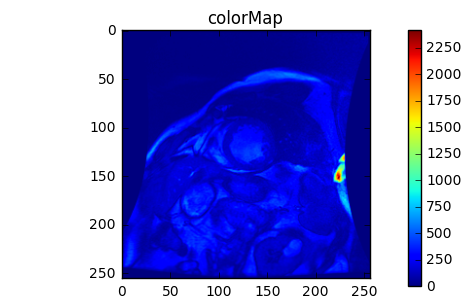

In [8]:
# initial look at what these images look like
import numpy as np
import matplotlib.pyplot as plt

H = exs[0][0] 

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

### Below is a raw image from the data

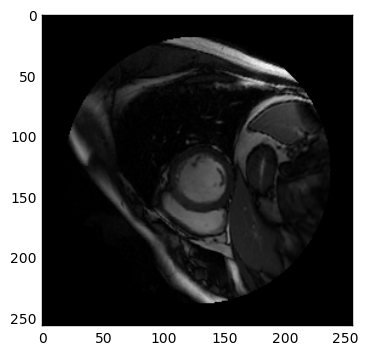

In [36]:
img1 = plt.imshow(exs[0][2], cmap='gray')
plt.show()

### below is an image with the inner contour overlayed

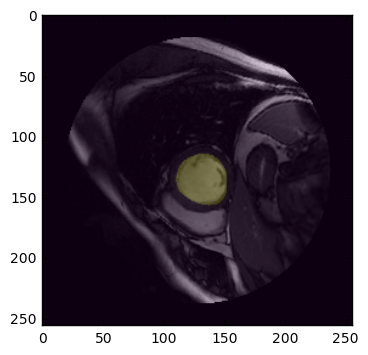

In [37]:
img1 = plt.imshow(exs[0][2], cmap='gray')
img2 = plt.imshow(exs[1][2], cmap=plt.cm.viridis, alpha=.2)
plt.show()

### below is an image with both inner (bright color) and outer (dark color) contours
It looks like the area that is meant to be covered by inner contour is brighter than the area that is within the outer contour but not in the inner contour. It seems like a thresholding technique could work in this situation.

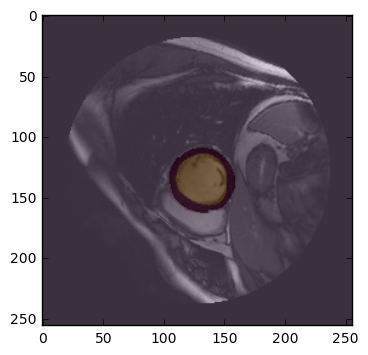

In [38]:
img1 = plt.imshow(exs[0][2], cmap='gray')
img2 = plt.imshow(exs[1][2], cmap=plt.cm.viridis, alpha=.2)
img3 = plt.imshow(exs[2][2], cmap=plt.cm.PuRd, alpha=.2)
plt.show()

## The following are some useful functions most of which have been incorporated formally into the contours Python package I have built

In [12]:
def get_pixel_positions(mask):
    # given a mask, gives you the pixel positions of the pixels marked True in the mask
    contour_pixels = []
    for x, row in enumerate(mask):
        for y, col_val in enumerate(row):
            if col_val == True:
                contour_pixels.append((x,y))
    return contour_pixels

In [30]:
inner_pixels = get_pixel_positions(exs[1][0])
outer_pixels = get_pixel_positions(exs[2][0])
inner_pixels

[(98, 127),
 (99, 124),
 (99, 125),
 (99, 126),
 (99, 127),
 (99, 128),
 (99, 129),
 (99, 130),
 (99, 131),
 (99, 132),
 (99, 133),
 (99, 134),
 (99, 135),
 (100, 122),
 (100, 123),
 (100, 124),
 (100, 125),
 (100, 126),
 (100, 127),
 (100, 128),
 (100, 129),
 (100, 130),
 (100, 131),
 (100, 132),
 (100, 133),
 (100, 134),
 (100, 135),
 (100, 136),
 (100, 137),
 (100, 138),
 (100, 139),
 (101, 121),
 (101, 122),
 (101, 123),
 (101, 124),
 (101, 125),
 (101, 126),
 (101, 127),
 (101, 128),
 (101, 129),
 (101, 130),
 (101, 131),
 (101, 132),
 (101, 133),
 (101, 134),
 (101, 135),
 (101, 136),
 (101, 137),
 (101, 138),
 (101, 139),
 (101, 140),
 (101, 141),
 (101, 142),
 (102, 120),
 (102, 121),
 (102, 122),
 (102, 123),
 (102, 124),
 (102, 125),
 (102, 126),
 (102, 127),
 (102, 128),
 (102, 129),
 (102, 130),
 (102, 131),
 (102, 132),
 (102, 133),
 (102, 134),
 (102, 135),
 (102, 136),
 (102, 137),
 (102, 138),
 (102, 139),
 (102, 140),
 (102, 141),
 (102, 142),
 (102, 143),
 (103, 119),

In [13]:
def empty_mask(shape):
    width, height = shape
    empty_mask = np.array([[False] * height] * width) 
    return empty_mask

In [ ]:
empty_mask(exs[0][0].shape).shape

In [14]:
def predict_inner(image, outer_pixels, threshold):
    predict_mask = empty_mask(image.shape)
    for pixel in outer_pixels:
        x,y = pixel
        pixel_val = image[x][y]
        if pixel_val >= threshold:
            predict_mask[x][y] = True
    return predict_mask

## In order to know if the contour technique will work, I'll make a histogram of the pixels within the outer contour. 
I found that it had a bimodal distribution--since the distribution of pixel brightness is bimodal, it should be possible to separate the pixels that are meant to be in the inner contour from those that are not meant to be in the inner contour with a properly selected threshold.

In [33]:
image = exs[0][2]
bag_of_outer_pixel_values = [image[x][y] for x,y in outer_pixels]

In [34]:
bag_of_outer_pixel_values

[66,
 73,
 68,
 54,
 50,
 61,
 58,
 53,
 64,
 63,
 54,
 50,
 60,
 54,
 60,
 62,
 60,
 70,
 78,
 63,
 56,
 54,
 48,
 61,
 61,
 54,
 58,
 62,
 67,
 70,
 78,
 72,
 54,
 56,
 65,
 68,
 63,
 67,
 68,
 68,
 70,
 74,
 70,
 63,
 73,
 80,
 87,
 100,
 115,
 119,
 104,
 96,
 98,
 104,
 101,
 84,
 76,
 73,
 49,
 40,
 57,
 69,
 48,
 62,
 79,
 77,
 66,
 63,
 72,
 73,
 73,
 94,
 116,
 131,
 146,
 144,
 150,
 168,
 161,
 136,
 119,
 130,
 133,
 103,
 90,
 88,
 63,
 50,
 60,
 57,
 61,
 73,
 51,
 57,
 70,
 79,
 75,
 63,
 56,
 55,
 65,
 100,
 146,
 175,
 191,
 181,
 146,
 141,
 177,
 194,
 159,
 131,
 150,
 163,
 136,
 122,
 122,
 100,
 83,
 69,
 60,
 62,
 64,
 57,
 74,
 56,
 64,
 71,
 65,
 79,
 86,
 78,
 76,
 77,
 111,
 171,
 206,
 210,
 187,
 139,
 113,
 142,
 189,
 198,
 172,
 168,
 192,
 202,
 178,
 159,
 157,
 149,
 122,
 78,
 64,
 73,
 69,
 59,
 59,
 42,
 54,
 69,
 84,
 70,
 49,
 72,
 99,
 116,
 139,
 154,
 189,
 227,
 229,
 197,
 138,
 91,
 106,
 161,
 191,
 188,
 190,
 203,
 222,
 233,
 225,
 206

It seems like around 150 to 175 are good spots for the threshold, we will try 155

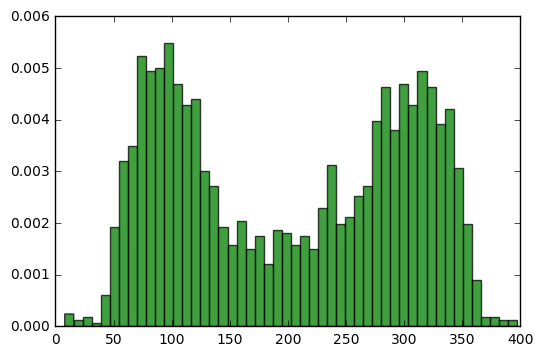

In [35]:
plt.hist(bag_of_outer_pixel_values, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

In [ ]:
predict_mask = predict_inner(image, outer_pixels, 155)

In [ ]:
img1 = plt.imshow(exs[0][0], cmap='gray')
img2 = plt.imshow(predict_mask, cmap=plt.cm.viridis, alpha=.2)
plt.show()

### Functions to use for evaluating the results of models with different thresholds

In [15]:
def get_correct_and_missed_pixels(predict_mask, inner_mask):
    correct_pixels = []
    missed_pixels = []
    target_pixels = get_pixel_positions(inner_mask)
    for pixel in target_pixels:
        x,y = pixel
        if predict_mask[x][y]==True:
            correct_pixels.append((x,y))
        else:
            missed_pixels.append((x,y))
    return correct_pixels, missed_pixels
        

In [16]:
def to_mask(image, pixels):
    mask = empty_mask(image.shape)
    for pixel in pixels:
        x,y = pixel
        mask[x][y] = True
    return mask

In [ ]:
correct_pixels, missed_pixels = get_correct_and_missed_pixels(predict_mask, exs[1][0])
correct_pixel_mask = to_mask(image, correct_pixels)

In [ ]:
img1 = plt.imshow(exs[0][0], cmap='gray')
img2 = plt.imshow(correct_pixel_mask, cmap=plt.cm.viridis, alpha=.2)
plt.show()

In [ ]:
missed_pixel_mask = to_mask(image, missed_pixels)
img1 = plt.imshow(exs[0][0], cmap='gray')
img2 = plt.imshow(missed_pixel_mask, cmap=plt.cm.viridis, alpha=.2)
plt.show()

In [17]:
def get_incorrect_pixels(predict_mask, inner_mask):
    predicted_pixels = get_pixel_positions(predict_mask)
    incorrect_pixels = []
    for pixel in predicted_pixels:
        x,y = pixel
        if inner_mask[x][y]==False:
            incorrect_pixels.append((x,y))
    return incorrect_pixels

In [ ]:
incorrect_pixels = get_incorrect_pixels(predict_mask, exs[1][0])
incorrect_pixel_mask = to_mask(image, incorrect_pixels)
img1 = plt.imshow(exs[0][0], cmap='gray')
img2 = plt.imshow(incorrect_pixel_mask, cmap=plt.cm.viridis, alpha=.2)
plt.show()

In [18]:
def get_precision_recall(correct_pixels, missed_pixels, incorrect_pixels):
    true_positives = float(len(correct_pixels))
    false_positives = float(len(incorrect_pixels))
    false_negatives = float(len(missed_pixels))
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    return precision, recall

In [ ]:
get_precision_recall(correct_pixels, missed_pixels, incorrect_pixels)

In [ ]:
img1 = plt.imshow(exs[0][1], cmap='gray')
img2 = plt.imshow(exs[1][1], cmap=plt.cm.viridis, alpha=.2)
img3 = plt.imshow(exs[2][1], cmap=plt.cm.PuRd, alpha=.2)
plt.show()

In [19]:
def contained_in(inner_mask, outer_mask):
    inner_pixels = get_pixel_positions(inner_mask)
    outer_pixel_set = set(get_pixel_positions(outer_mask))
    for pixel in inner_pixels:
        if pixel not in outer_pixel_set:
            return False
    return True

In [20]:
from contours.lib.vistools import visualize

In [21]:
def evaluate_batch(batch, threshold, show_images=False, clean_data=False):
    metrics = []
    images, inner_masks, outer_masks = batch
    for image, inner_mask, outer_mask in zip(images, inner_masks, outer_masks):
        if clean_data and not contained_in(inner_mask, outer_mask):
            continue
        outer_pixels = get_pixel_positions(outer_mask)
        predict_mask = predict_inner(image, outer_pixels, threshold)
        correct_pixels, missed_pixels = get_correct_and_missed_pixels(predict_mask, inner_mask)
        incorrect_pixels = get_incorrect_pixels(predict_mask, inner_mask)
        metrics.append(get_precision_recall(correct_pixels, missed_pixels, incorrect_pixels))
        if show_images:
            visualize(image, inner_mask, outer_mask, predict_mask, correct_pixels, missed_pixels, incorrect_pixels)
    return metrics

### Below are images showing, for each image in the batch:
1. the image with the ground truth inner and outer contours superimposed
2. The inner contours as predicted by the model
3. The pixels that the model got correct (true positives)
4. The pixels the model missed (false negatives)
5. The pixels the model predicted which it should not have predicted (false positives)

Some of the images seem to have faulty ground truth where the inner and outer contours don't fully overlap. These will need to be excluded from the analysis for determining the right threshold to use

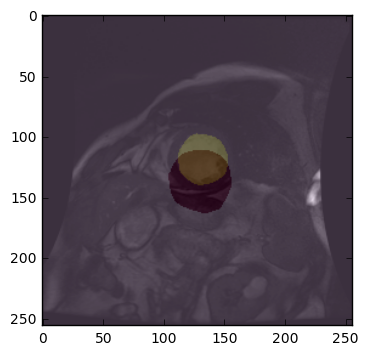

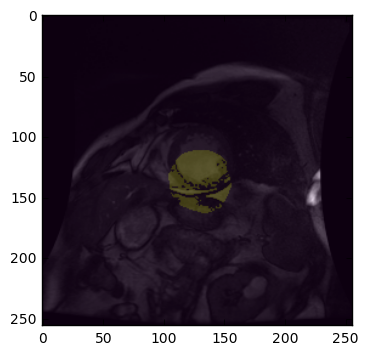

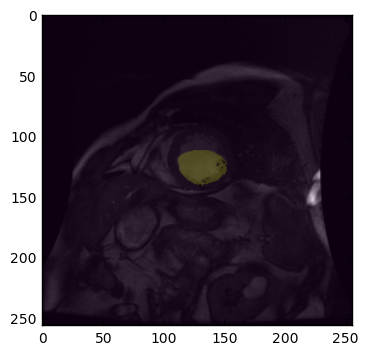

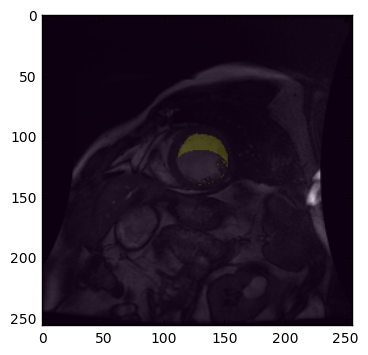

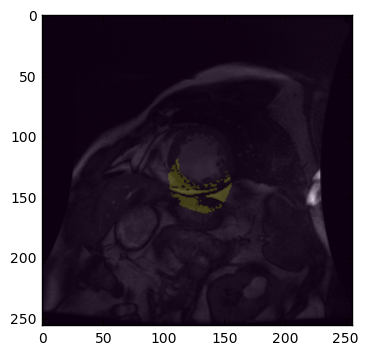

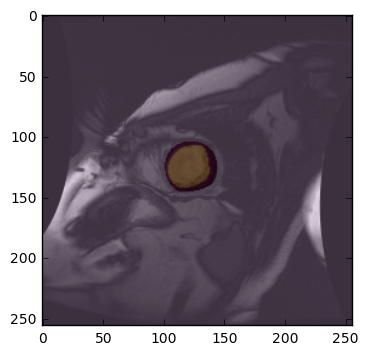

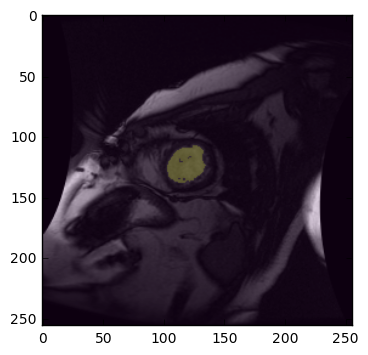

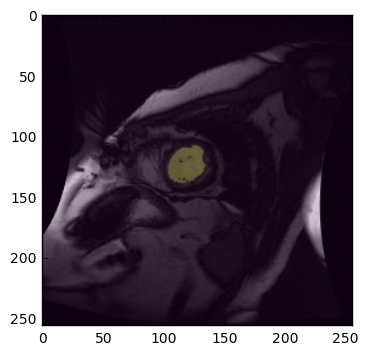

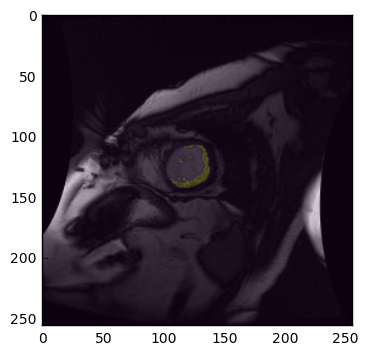

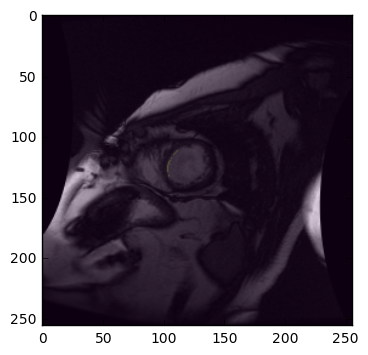

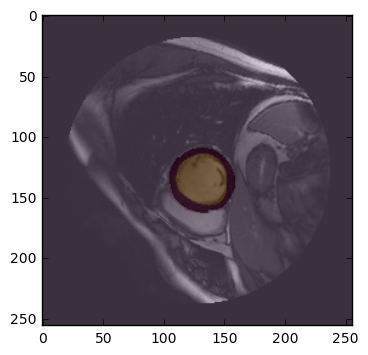

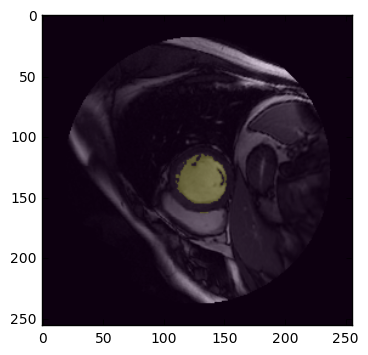

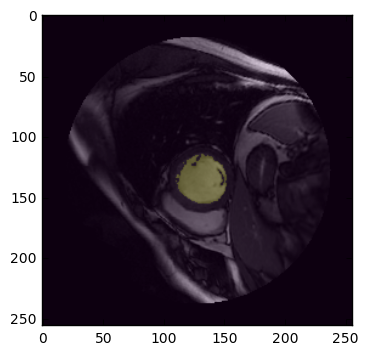

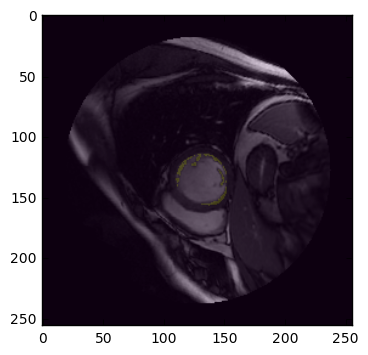

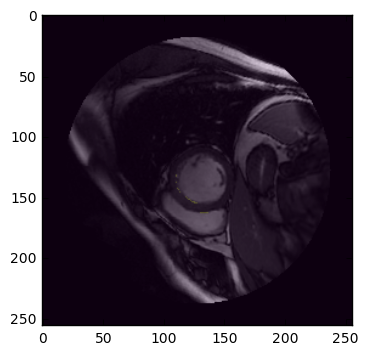

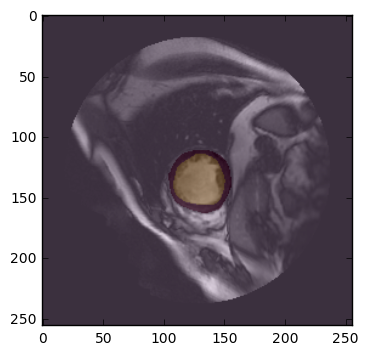

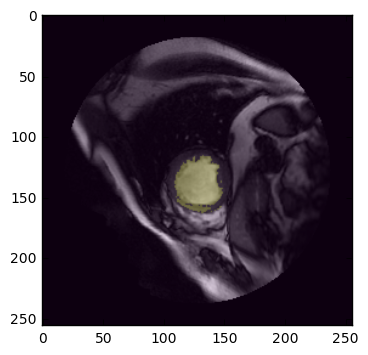

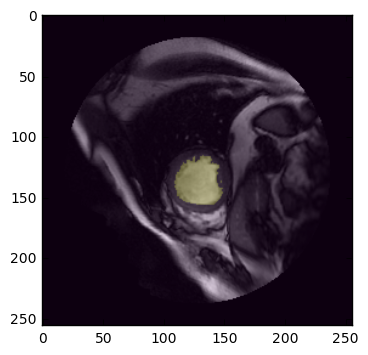

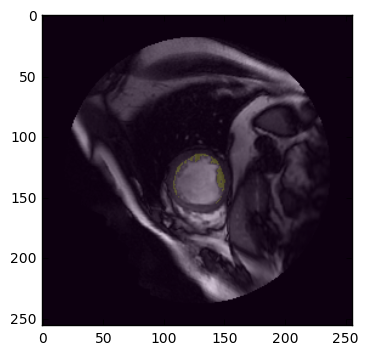

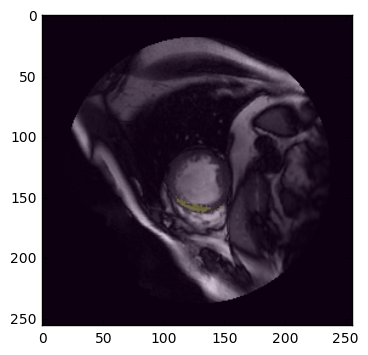

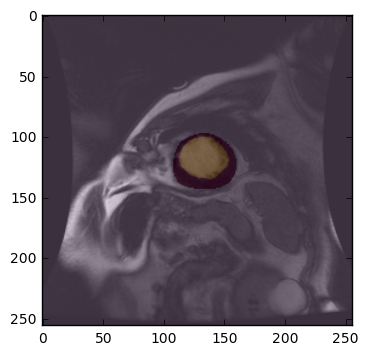

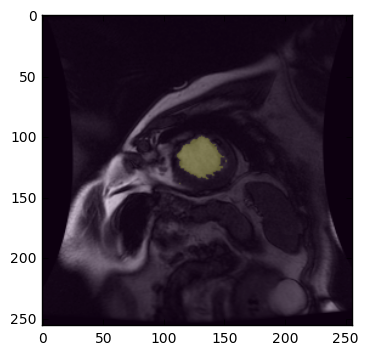

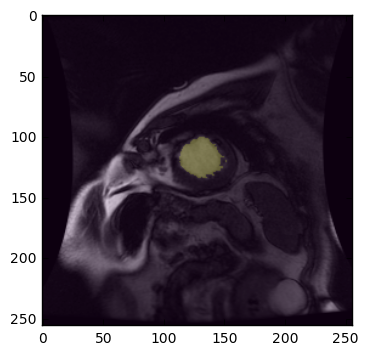

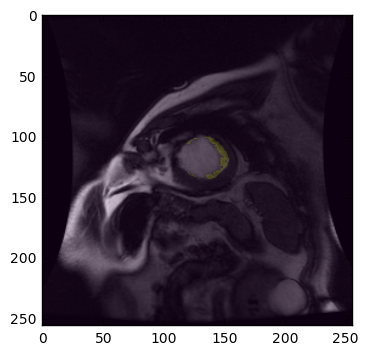

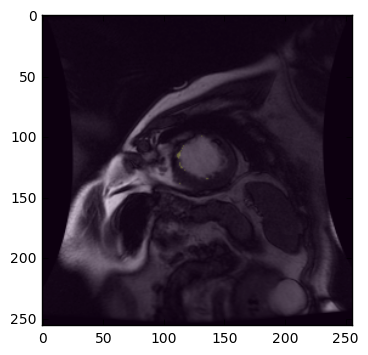

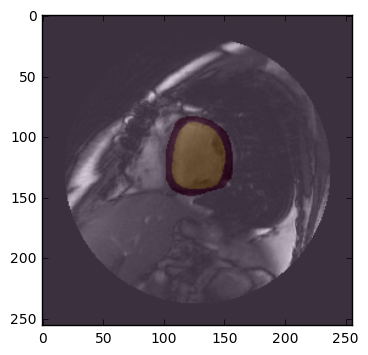

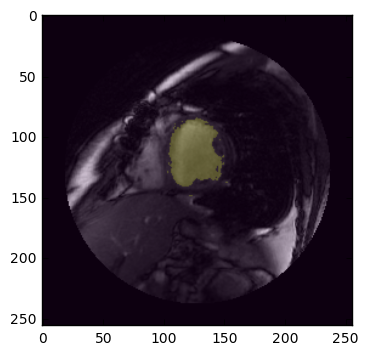

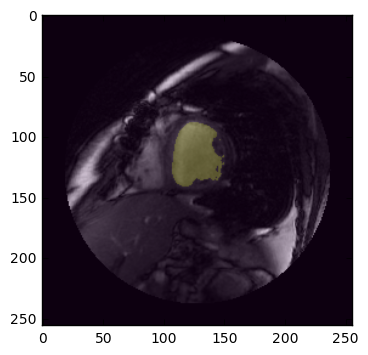

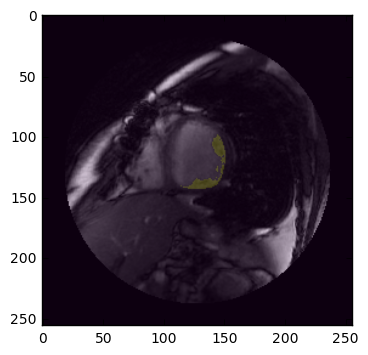

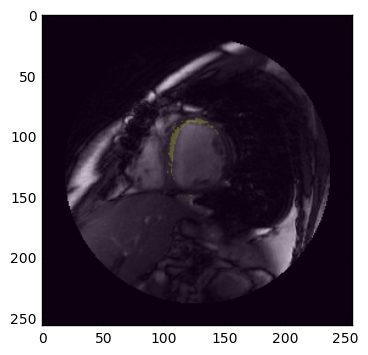

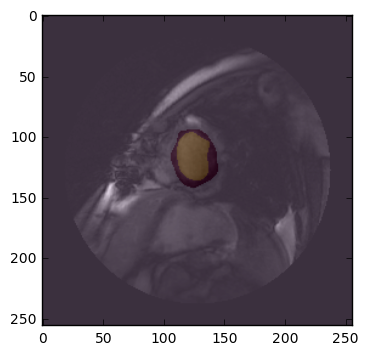

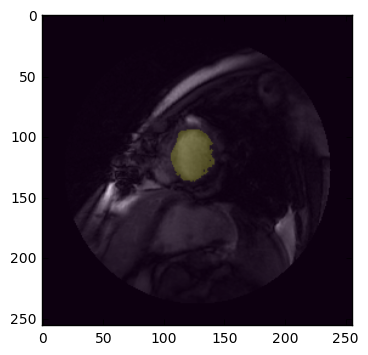

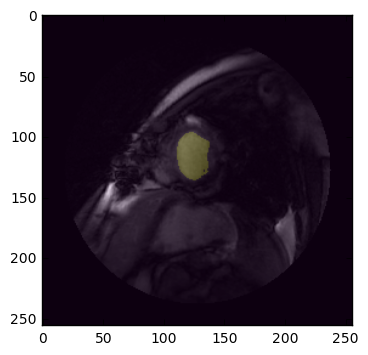

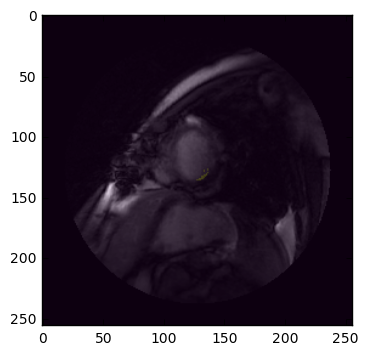

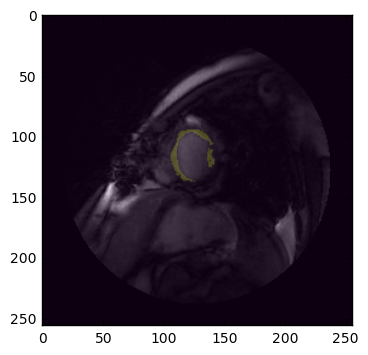

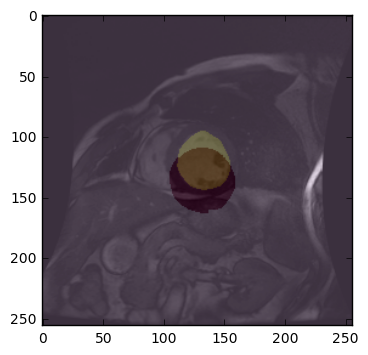

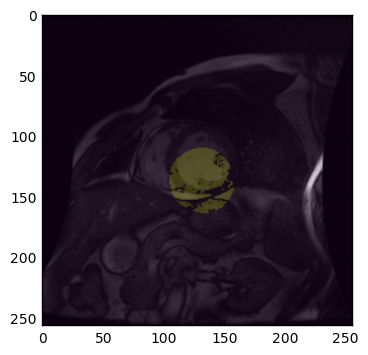

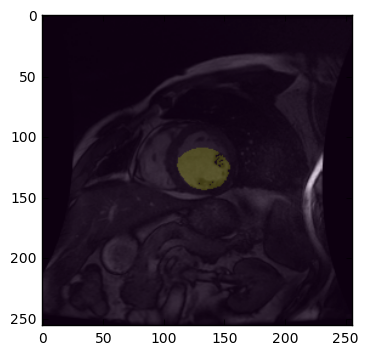

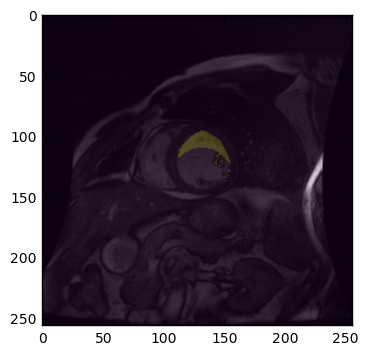

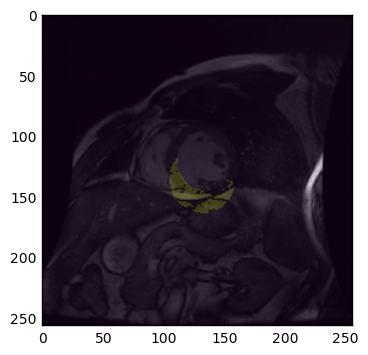

[(0.5401102265768524, 0.6433260393873085),
 (0.9758522727272727, 0.7193717277486911),
 (0.9807073954983923, 0.8634111818825194),
 (0.9034175334323923, 0.8551336146272855),
 (0.9706877113866967, 0.8061797752808989),
 (0.8893088552915767, 0.8305597579425114),
 (0.7220779220779221, 0.972027972027972),
 (0.6018172100481026, 0.7033104309806371)]

In [22]:
evaluate_batch(exs, 155, True)

In [27]:
def evaluate_epoch(threshold, show_images=False, clean_data=False):
    data_generator = contours.generator.TrainingDataGenerator(contour_option='both')
    data_gen = data_generator.flow_contour_data(epoch_msg=True)
    batch = next(data_gen)
    metrics = []
    while batch != 'end epoch':
        metrics.append(evaluate_batch(batch, threshold, show_images=show_images, clean_data=clean_data))
        batch = next(data_gen)
    return metrics

### 155 seems like a decent threshold, but it would be nice to add some more rigor--I'll evaluate the model on a range of different thresholds and see which is the best:

In [62]:
epoch_metrics = []
for threshold in range(20,220, 10):
    metrics = evaluate_epoch(threshold, show_images=False, clean_data=True)
    epoch_metrics.append(metrics)
    print(str(threshold) + " complete")

20 complete
30 complete
40 complete
50 complete
60 complete
70 complete
80 complete
90 complete
100 complete
110 complete
120 complete
130 complete
140 complete
150 complete
160 complete
170 complete
180 complete


ZeroDivisionError: float division by zero

In [63]:
mean_epoch_metrics = []
for e_metrics in epoch_metrics:
    precisions = [precision for precision, recall in e_metrics[0]]
    recalls = [recall for precision, recall in e_metrics[0]]
    mean_epoch_metrics.append((np.mean(precisions), np.mean(recalls)))

### Find the mean of the precision and recall metrics in each epoch (each epoch has been run with a different threshold)

In [64]:
mean_epoch_metrics

[(0.58414183340948278, 1.0),
 (0.61650036018946042, 1.0),
 (0.6831223479780264, 0.99625548688331012),
 (0.72840897720595865, 0.98574468092787582),
 (0.66492440259158792, 0.98668396731346453),
 (0.77254399133669072, 0.97269871942351516),
 (0.84309225549272049, 0.94360588772312304),
 (0.79932044101223754, 0.92024731384504099),
 (0.8512895508143421, 0.93791983981213745),
 (0.88485722471249495, 0.91556519032741146),
 (0.9131869366647376, 0.89471162223144718),
 (0.88513492729328491, 0.79359282317414781),
 (0.81584419376291095, 0.84783374194736505),
 (0.82462609532480557, 0.80174517141801505),
 (0.97073427016503899, 0.63528785312105851),
 (0.88739261879050824, 0.63946183944762947),
 (0.8198668357233011, 0.61104244533026009)]

### Get the F1 score so we can consolidate our metrics into a single number for each threshold

In [65]:
f1_score = lambda precision, recall: 2 * (precision * recall) / (precision + recall)

In [69]:
thresholds = range(20,190, 10)

In [70]:
f1_scores = [f1_score(precision,recall) for precision, recall in mean_epoch_metrics]

### Scatterplot of F1 scores shows that a threshold around 125 seems to be overall best, though it depends on the application--if missing a pixel is more damaging than getting a wrong pixel, we might want to set our threshold lower than 125, if the opposite is true, we might want to set it higher than 125.

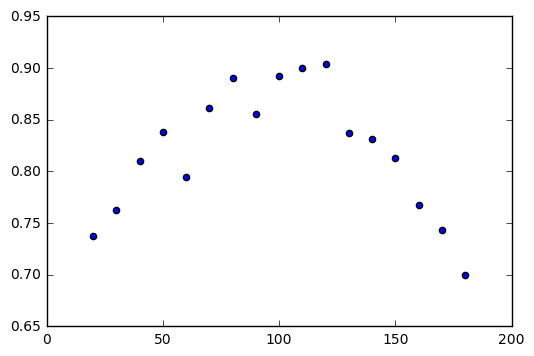

In [71]:
plt.scatter(thresholds, f1_scores)
plt.show()

### The relationship looks parabolic, so I can set a best fit line with a second order polynomial to model the relationship
If I wanted to get to the optimal threshold analytically, I could take the derivative of the best fit line and find its maximum--that is where I'd set my threshold 

In [94]:
fit_line = np.polyfit(x=thresholds, y=f1_scores, deg=2)

In [103]:
thresholds = [float(i) for i in thresholds]
thresholds

[20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 110.0,
 120.0,
 130.0,
 140.0,
 150.0,
 160.0,
 170.0,
 180.0]

In [102]:
plt.scatter(thresholds, f1_scores)
plt.plot(fit_line[0] * thresholds * thresholds + fit_line[1] * thresholds + fit_line[2])
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer